Importando as bibliotecas e a base de dados utilizadas

In [42]:
import pandas as pd
import numpy as np


In [85]:
data = pd.read_csv("Crash_Data.csv", low_memory = False)
data.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


Verificando informações básicas sobre a base de dados

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

Removendo colunas que não aparentam influência relevante no dataset

In [45]:
data = data.drop(['Crash ID', 'Heavy Rigid Truck Involvement', 'National Remoteness Areas', 
           'SA4 Name 2016', 'National LGA Name 2017', 'National Road Type'], axis = 1)

Lidando com valores nulos

In [46]:
data.isnull().sum()

State                              0
Month                              0
Year                               0
Dayweek                            0
Time                              40
Crash Type                         0
Bus Involvement                   22
Articulated Truck Involvement     22
Speed Limit                      702
Road User                          0
Gender                            27
Age                                0
Christmas Period                   0
Easter Period                      0
Age Group                         90
Day of week                        0
Time of day                        0
dtype: int64

In [47]:
#Eliminando linhas com valores nulos ou vazios
data = data.dropna()
#verificando correção
data.isnull().sum()

State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash Type                       0
Bus Involvement                  0
Articulated Truck Involvement    0
Speed Limit                      0
Road User                        0
Gender                           0
Age                              0
Christmas Period                 0
Easter Period                    0
Age Group                        0
Day of week                      0
Time of day                      0
dtype: int64

Tratamento de colunas para formatos manipuláveis

In [48]:
data.nunique()

State                               8
Month                              12
Year                               33
Dayweek                             7
Time                             1413
Crash Type                          2
Bus Involvement                     2
Articulated Truck Involvement       2
Speed Limit                        30
Road User                           7
Gender                              3
Age                               102
Christmas Period                    2
Easter Period                       2
Age Group                           6
Day of week                         2
Time of day                         2
dtype: int64

In [49]:
#Verificando valores 'estranhos' na coluna state
data['State'].value_counts().sum

<bound method Series.sum of State
NSW    16234
Vic    11380
Qld    10469
WA      6137
SA      4539
Tas     1541
NT      1372
ACT      325
Name: count, dtype: int64>

In [50]:
#convertendo de objeto para utilização adequada
data = pd.concat([data, pd.get_dummies(data['State'])], axis = 1)
data['State'].value_counts()

State
NSW    16234
Vic    11380
Qld    10469
WA      6137
SA      4539
Tas     1541
NT      1372
ACT      325
Name: count, dtype: int64

In [51]:
#Verificando valores 'estranhos' na coluna dayweek
data['Dayweek'].value_counts().sum

<bound method Series.sum of Dayweek
Saturday     9528
Friday       8525
Sunday       8332
Thursday     6988
Wednesday    6555
Tuesday      6063
Monday       6006
Name: count, dtype: int64>

In [52]:
#Substituindo os dias da semana por números inteiros
data['Dayweek'] = data['Dayweek'].replace('Sunday', 0)
data['Dayweek'] = data['Dayweek'].replace('Monday', 1)
data['Dayweek'] = data['Dayweek'].replace('Tuesday', 2)
data['Dayweek'] = data['Dayweek'].replace('Wednesday', 3)
data['Dayweek'] = data['Dayweek'].replace('Thursday', 4)
data['Dayweek'] = data['Dayweek'].replace('Friday', 5)
data['Dayweek'] = data['Dayweek'].replace('Saturday', 6)
data['Dayweek'].value_counts()

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\381351552.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Dayweek'] = data['Dayweek'].replace('Saturday', 6)


Dayweek
6    9528
5    8525
0    8332
4    6988
3    6555
2    6063
1    6006
Name: count, dtype: int64

In [53]:
#Verificando valores 'estranhos' na coluna time
data['Time'].value_counts().sum

<bound method Series.sum of Time
15:00    1131
16:00    1040
18:00     973
17:00     946
14:00     939
         ... 
10:26       1
3:32        1
6:39        1
0:49        1
6:57        1
Name: count, Length: 1413, dtype: int64>

In [54]:
#converter de objeto para utilização adequada
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

data['Time'].value_counts()

Time
15    3509
16    3226
17    3131
18    2955
14    2896
13    2554
19    2498
11    2364
12    2350
10    2269
20    2218
21    2063
22    2012
23    1982
9     1943
8     1875
0     1814
6     1781
7     1748
1     1657
2     1406
5     1342
3     1298
4     1106
Name: count, dtype: int64

In [55]:
#Não precisa verificar valores estranhos pois só existe 2 valores unicos
data['Crash Type'] = data['Crash Type'].replace('Single', 0)
data['Crash Type'] = data['Crash Type'].replace('Multiple', 1)

data['Crash Type'].value_counts()

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\4184395810.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Crash Type'] = data['Crash Type'].replace('Multiple', 1)


Crash Type
0    28660
1    23337
Name: count, dtype: int64

In [56]:
#Não precisa verificar valores estranhos pois só existe 2 valores unicos
data['Bus Involvement'] = data['Bus Involvement'].replace('No', 0)
data['Bus Involvement'] = data['Bus Involvement'].replace('Yes', 1)
data['Bus Involvement'].value_counts()
#data['Speed Limit'] = pd.to_numeric(data['Speed Limit'], downcast = 'integer')

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\2829296646.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Bus Involvement'] = data['Bus Involvement'].replace('Yes', 1)


Bus Involvement
0    51029
1      968
Name: count, dtype: int64

In [57]:
#Não precisa verificar valores estranhos pois só existe 2 valores unicos
data['Articulated Truck Involvement'] = data['Articulated Truck Involvement'].replace('No', 0)
data['Articulated Truck Involvement'] = data['Articulated Truck Involvement'].replace('Yes', 1)
data['Articulated Truck Involvement'].value_counts()

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\2853043000.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Articulated Truck Involvement'] = data['Articulated Truck Involvement'].replace('Yes', 1)


Articulated Truck Involvement
0    46704
1     5293
Name: count, dtype: int64

In [58]:
#Verificando valores únicos na coluna speed limit
data['Speed Limit'].value_counts().sum

<bound method Series.sum of Speed Limit
100            10988
100             7198
60              7107
60              6550
80              4435
110             3958
50              2879
110             2062
70              1887
80              1675
90               818
-9               672
70               646
90               317
40               297
75               252
130              115
40                47
20                24
50                20
10                18
30                11
<40                5
30                 3
20                 3
5                  3
Unspecified        2
75                 2
25                 2
15                 1
Name: count, dtype: int64>

In [59]:
#removendo valores não adequados
data = data.drop(data[data['Speed Limit'] == '<40'].index)
data = data.drop(data[data['Speed Limit'] == 'Unspecified'].index)



In [60]:
#Convertendo coluna object para inteiro (int64)
data['Speed Limit'] = pd.to_numeric(data['Speed Limit'], downcast = 'integer')

#removendo valores abaixo de 0
data = data.drop(data[data['Speed Limit'] < 0].index)

#verificando correção
data['Speed Limit'].value_counts().sum

<bound method Series.sum of Speed Limit
100    18186
60     13657
80      6110
110     6020
50      2899
70      2533
90      1135
40       344
75       254
130      115
20        27
10        18
30        14
5          3
25         2
15         1
Name: count, dtype: int64>

In [61]:
#Verificando valores 'estranhos' na coluna road user
data['Road User'].value_counts().sum

<bound method Series.sum of Road User
Driver                          23250
Passenger                       11744
Pedestrian                       8011
Motorcycle rider                 6500
Pedal cyclist                    1391
Motorcycle pillion passenger      352
Other/-9                           70
Name: count, dtype: int64>

In [62]:
#Transformando coluna object para tratavel
data['Road User'], _=pd.factorize(data['Road User'])
data['Road User'].value_counts()

Road User
2    23250
3    11744
0     8011
1     6500
5     1391
4      352
6       70
Name: count, dtype: int64

In [63]:
#Verificando valores 'estranhos' na coluna speed limit
data['Gender'].value_counts().sum

<bound method Series.sum of Gender
Male           36740
Female         14577
Unspecified        1
Name: count, dtype: int64>

In [64]:
#Removendo valor não especificado
data = data.drop(data[data['Gender'] == 'Unspecified'].index)
#Verificando
data['Gender'].value_counts().sum

<bound method Series.sum of Gender
Male      36740
Female    14577
Name: count, dtype: int64>

In [65]:
#Alternando o gênero para números inteiros
data['Gender'] = data['Gender'].replace('Male', 0)
data['Gender'] = data['Gender'].replace('Female', 1)
data['Gender'].value_counts()

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\3996587632.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace('Female', 1)


Gender
0    36740
1    14577
Name: count, dtype: int64

In [66]:
#Não precisa verificar valores estranhos pois só existe 2 valores unicos
data['Christmas Period'] = data['Christmas Period'].replace('No', 0)
data['Christmas Period'] = data['Christmas Period'].replace('Yes', 1)
data['Christmas Period'].value_counts()

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\2437868721.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Christmas Period'] = data['Christmas Period'].replace('Yes', 1)


Christmas Period
0    49740
1     1577
Name: count, dtype: int64

In [67]:
#Não precisa verificar valores estranhos pois só existe 2 valores unicos
data['Easter Period'] = data['Easter Period'].replace('No', 0)
data['Easter Period'] = data['Easter Period'].replace('Yes', 1)
data['Easter Period'].value_counts()

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\3788935916.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Easter Period'] = data['Easter Period'].replace('Yes', 1)


Easter Period
0    51051
1      266
Name: count, dtype: int64

In [68]:
#Verificando valores 'estranhos' na coluna speed limit
data['Age Group'].value_counts().sum

<bound method Series.sum of Age Group
17_to_25       13379
40_to_64       13095
26_to_39       11970
75_or_older     5020
65_to_74        3928
0_to_16         3925
Name: count, dtype: int64>

In [69]:
#Transformando coluna object para tratavel
#data['Age Group'] = pd.to_numeric(data['Age Group'], downcast = 'integer')
data['Age Group'], _=pd.factorize(data['Age Group'])
data['Age Group'].value_counts()
#data['Age Group'].value_counts()

Age Group
1    13379
2    13095
0    11970
5     5020
4     3928
3     3925
Name: count, dtype: int64

In [70]:
#Alternando o dia da semana para números inteiros
data['Day of week'] = data['Day of week'].replace('Weekend', 0)
data['Day of week'] = data['Day of week'].replace('Weekday', 1)
data['Day of week'].value_counts()

C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\2149062011.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Day of week'] = data['Day of week'].replace('Weekday', 1)


Day of week
1    30215
0    21102
Name: count, dtype: int64

In [71]:
#Alternando o time of day para números inteiros
data['Time of day'] = data['Time of day'].replace('Night', 0)
data['Time of day'] = data['Time of day'].replace('Day', 1)
data['Time of day'].value_counts()



C:\Users\viniz\AppData\Local\Temp\ipykernel_17260\1591927516.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Time of day'] = data['Time of day'].replace('Day', 1)


Time of day
1    29295
0    22022
Name: count, dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51317 entries, 1 to 52842
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State                          51317 non-null  object
 1   Month                          51317 non-null  int64 
 2   Year                           51317 non-null  int64 
 3   Dayweek                        51317 non-null  int64 
 4   Time                           51317 non-null  int32 
 5   Crash Type                     51317 non-null  int64 
 6   Bus Involvement                51317 non-null  int64 
 7   Articulated Truck Involvement  51317 non-null  int64 
 8   Speed Limit                    51317 non-null  int16 
 9   Road User                      51317 non-null  int64 
 10  Gender                         51317 non-null  int64 
 11  Age                            51317 non-null  int64 
 12  Christmas Period               51317 non-null  int64 
 13  Easter

Nesse ponto, decidi remover mais duas colunas que não estavam se encaixando com a proposta da análise.

In [73]:

data = data.drop(['State', 'Age Group'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51317 entries, 1 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Month                          51317 non-null  int64
 1   Year                           51317 non-null  int64
 2   Dayweek                        51317 non-null  int64
 3   Time                           51317 non-null  int32
 4   Crash Type                     51317 non-null  int64
 5   Bus Involvement                51317 non-null  int64
 6   Articulated Truck Involvement  51317 non-null  int64
 7   Speed Limit                    51317 non-null  int16
 8   Road User                      51317 non-null  int64
 9   Gender                         51317 non-null  int64
 10  Age                            51317 non-null  int64
 11  Christmas Period               51317 non-null  int64
 12  Easter Period                  51317 non-null  int64
 13  Day of week          

In [74]:
#Verificando duplicatas
data.duplicated().sum()

146

In [75]:
#Removendo duplicatas
data = data.drop_duplicates()
#verificando
data.duplicated().sum()

0

In [76]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(data)
#profile.to_file("crash_data2.csv")

,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,...,Day of week,Time of day,ACT,NSW,NT,Qld,SA,Tas,Vic,WA
Month,1.000000,-0.021913,0.007635,0.003391,-0.006200,0.010178,0.001569,0.007910,0.007904,-0.002444,...,-0.006738,-0.012869,-0.006538,-0.000776,0.012804,0.026001,-0.005945,-0.018767,-0.022529,0.008302
Year,-0.021913,1.000000,-0.011471,-0.010494,-0.019943,-0.012751,-0.014240,0.003660,-0.016196,-0.029893,...,0.019675,0.049536,0.059219,-0.039199,0.069952,0.021445,-0.014314,-0.007644,-0.030031,0.045330
Dayweek,0.007635,-0.011471,1.000000,0.036246,-0.014769,-0.000931,-0.012833,-0.009777,-0.011224,-0.017301,...,-0.072227,-0.064857,0.005710,-0.006800,0.025647,0.003181,0.002335,0.006398,-0.014023,0.006514
Time,0.003391,-0.010494,0.036246,1.000000,0.050159,-0.002286,-0.047817,-0.023281,-0.044174,0.027558,...,0.025067,-0.081523,-0.000542,-0.011047,0.022510,-0.011523,0.006810,0.014536,0.001025,0.005759
Crash Type,-0.006200,-0.019943,-0.014769,0.050159,1.000000,0.052812,0.229948,0.038710,0.224799,0.069051,...,0.103412,0.208403,0.004370,0.020885,-0.050177,0.001233,-0.016449,0.013620,0.035860,-0.049575
Bus Involvement,0.010178,-0.012751,-0.000931,-0.002286,0.052812,1.000000,-0.017001,-0.056468,-0.008082,0.029627,...,0.040650,0.033599,0.004101,0.034699,-0.007718,0.010480,-0.014846,0.002446,-0.020401,-0.022369
Articulated Truck Involvement,0.001569,-0.014240,-0.012833,-0.047817,0.229948,-0.017001,1.000000,0.150152,0.053309,-0.025166,...,0.109781,0.024089,-0.007634,0.032841,-0.030856,0.013752,0.003120,-0.010905,-0.011114,-0.032641
Speed Limit,0.007910,0.003660,-0.009777,-0.023281,0.038710,-0.056468,0.150152,1.000000,0.240778,0.015693,...,-0.030595,0.067418,-0.029648,-0.077372,0.032604,-0.019712,0.047403,0.036820,-0.006910,0.074488
Road User,0.007904,-0.016196,-0.011224,-0.044174,0.224799,-0.008082,0.053309,0.240778,1.000000,0.111074,...,-0.029095,0.047249,-0.000171,-0.030801,-0.017141,0.015068,0.015122,0.013467,-0.011071,0.026700
Gender,-0.002444,-0.029893,-0.017301,0.027558,0.069051,0.029627,-0.025166,0.015693,0.111074,1.000000,...,0.055322,0.130033,-0.008507,0.004835,0.002804,-0.009007,-0.004959,0.006264,0.009739,-0.007010


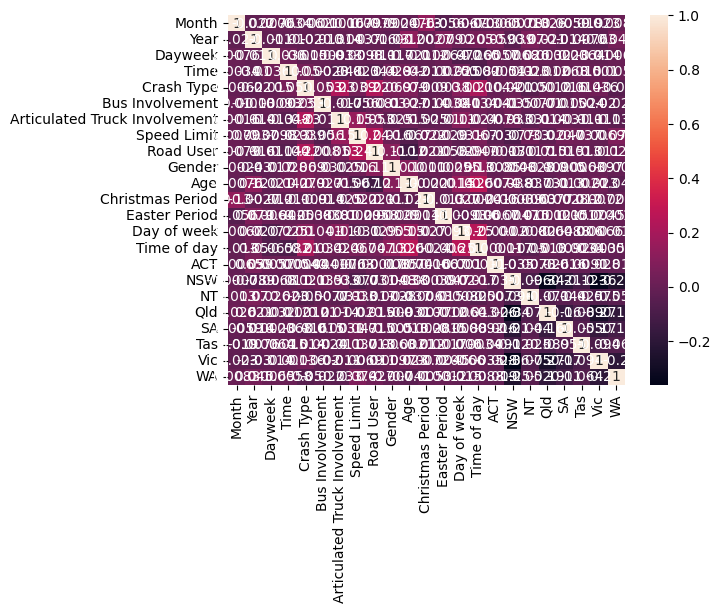

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(data.corr(numeric_only = True), annot = True)
#verificar fora do heatmap
data.corr()


Aplicar os modelos de classificação
- Arvore de Decisão 
https://scikit-learn.org/stable/modules/tree.html#classification
- KNN (Vizinhos mais proximos) 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- Regressão Logistica 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [78]:
# Separar  X e y para treino
#mais correlação 'Articulated Truck Involvement','Road User','Day of week','Time of day'
X = data.drop(['Crash Type'], axis = 1)
y = data['Crash Type']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
#Importar as bibliotecas
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn import svm

In [81]:
#Criar o  Classificador e fazer o fit
clf_Tree = tree.DecisionTreeClassifier().fit(X_train,y_train)
clf_KNN = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
clf_Log = LogisticRegression(random_state=0, max_iter= 10000).fit(X_train,y_train)
clf_Forest = RandomForestClassifier(n_estimators=800, random_state=5).fit(X_train,y_train)
clf_SVM = svm.SVC().fit(X_train,y_train)
clf_KNNR = RadiusNeighborsClassifier(radius=20.0).fit(X_train, y_train)

Por fim, pode-se verificar que a função score() do modelo RandomForestClassifier calcula a proporção de previsões corretas em relação ao total de amostras no conjunto de teste (X_test, y_test). Isso significa que o modelo foi capaz de classificar corretamente aproximadamente 73% dos casos no conjunto de dados de teste.

Também é possível notar que ao retirar as colunas com menor correlação, apenas pioramos a acurácia. Possivelmente isso se traduz pelo longo período, gerando mais ruídos nos dados. É possível que a acurácia fosse mais precisa se o tempo analisado fosse menor. Isso porque podem ter ocorrido mudanças significativas em leis de trânsito, infraestrutura rodoviária, tipos de veículos e comportamento dos motoristas, além de avanços na tecnologia automotiva. Isso pode introduzir variabilidade nos dados, dificultando a detecção de padrões consistentes pelo modelo. Usar um período mais recente pode refletir melhor as condições atuais e criar um modelo mais preciso.

Por outro lado, também é possível que, ao reduzir o período, o tamanho da base de dados diminua significativamente, o que poderia afetar o treinamento do modelo, já que teria menos dados para aprender. Portanto, uma análise exploratória seria recomendada para verificar se a correlação das variáveis com o target melhora ao limitar o período, e se o volume de dados ainda é suficiente para treinar modelos robustos.

In [82]:
#Ver o Score do Treino

print("Tree:", clf_Tree.score(X_test,y_test))
print("KNN:", clf_KNN.score(X_test,y_test))
print("Log:", clf_Log.score(X_test,y_test))
print("Forest:", clf_Forest.score(X_test,y_test))
print("SVM:", clf_SVM.score(X_test,y_test))
print("KNNR:", clf_KNNR.score(X_test,y_test))

Tree: 0.6568958370344051
KNN: 0.6072126487830876
Log: 0.6664890152188073
Forest: 0.7306211878960147
SVM: 0.552732871439569
KNNR: 0.5761236454077101
